In [2]:
import socket
import json

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind(("0.0.0.0", 5005))

print("Listening for sensor data...")

Listening for sensor data...


In [113]:
def get_sensor_data():
    data, _ = sock.recvfrom(65535)
    msg = json.loads(data.decode())
    return msg

In [ ]:
# Collect imu and gps data
imu_data = []
gps_data = []

for _ in range(2000):
    msg = get_sensor_data()
    if msg["topic"] == "/imu":
        imu_data.append(msg)
    elif msg["topic"] == "/gps":
        gps_data.append(msg)

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
type(imu_data[0])

dict

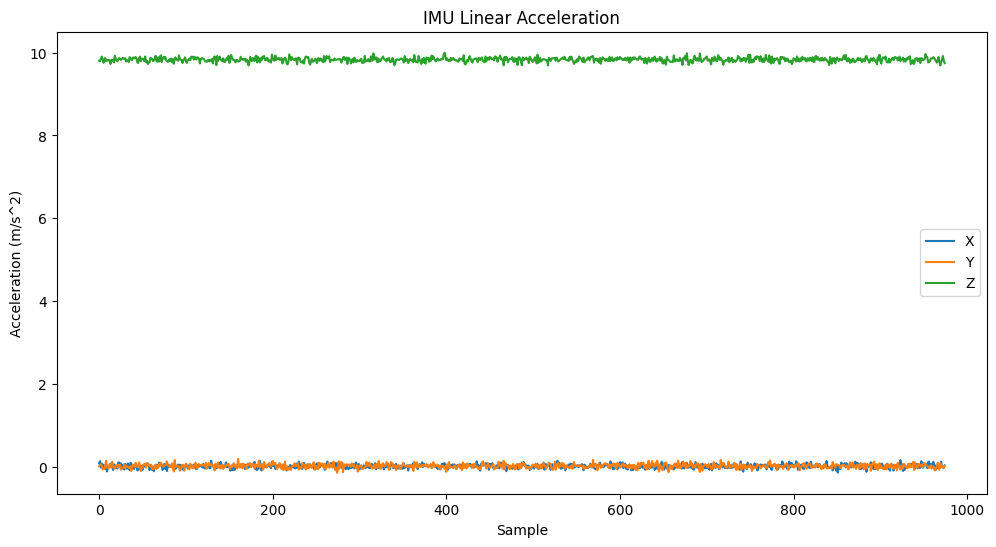

In [ ]:
imu_x = [d.get('linear_acceleration', {})[0] for d in imu_data]
imu_y = [d.get('linear_acceleration', {})[1] for d in imu_data]
imu_z = [d.get('linear_acceleration', {})[2] for d in imu_data]

plt.figure(figsize=(12, 6))
plt.plot(imu_x, label='X',)
plt.plot(imu_y, label='Y')
plt.plot(imu_z, label='Z')
plt.legend()
plt.title('IMU Linear Acceleration')
plt.xlabel('Sample')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

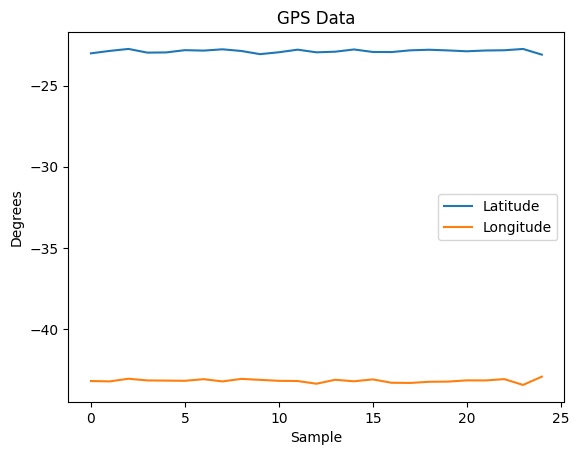

In [ ]:
gps_lat = [d.get('latitude', 0) for d in gps_data]
gps_lon = [d.get('longitude', 0) for d in gps_data]

plt.scatter(gps_lat, label='Latitude')
plt.scatter(gps_lon, label='Longitude')
plt.legend()
plt.title('GPS Data')
plt.xlabel('Sample')
plt.ylabel('Degrees')
plt.show()